# Breast Cancer Classification - Logistic Regression vs KNN

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

## caricamento del dataset 

In [196]:
data = load_breast_cancer()
X = data.data
y = data.target

# Trasformazione in DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# colonna target
df['target'] = data.target

In [197]:
# check del dataset 
print("=== Controllo valori mancanti ===")
print(df.isnull().sum(), "\n")

print("=== Tipi di dato ===")
print(df.dtypes, "\n")

=== Controllo valori mancanti ===
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64 

=== Tipi di dato ===
mean radius                floa

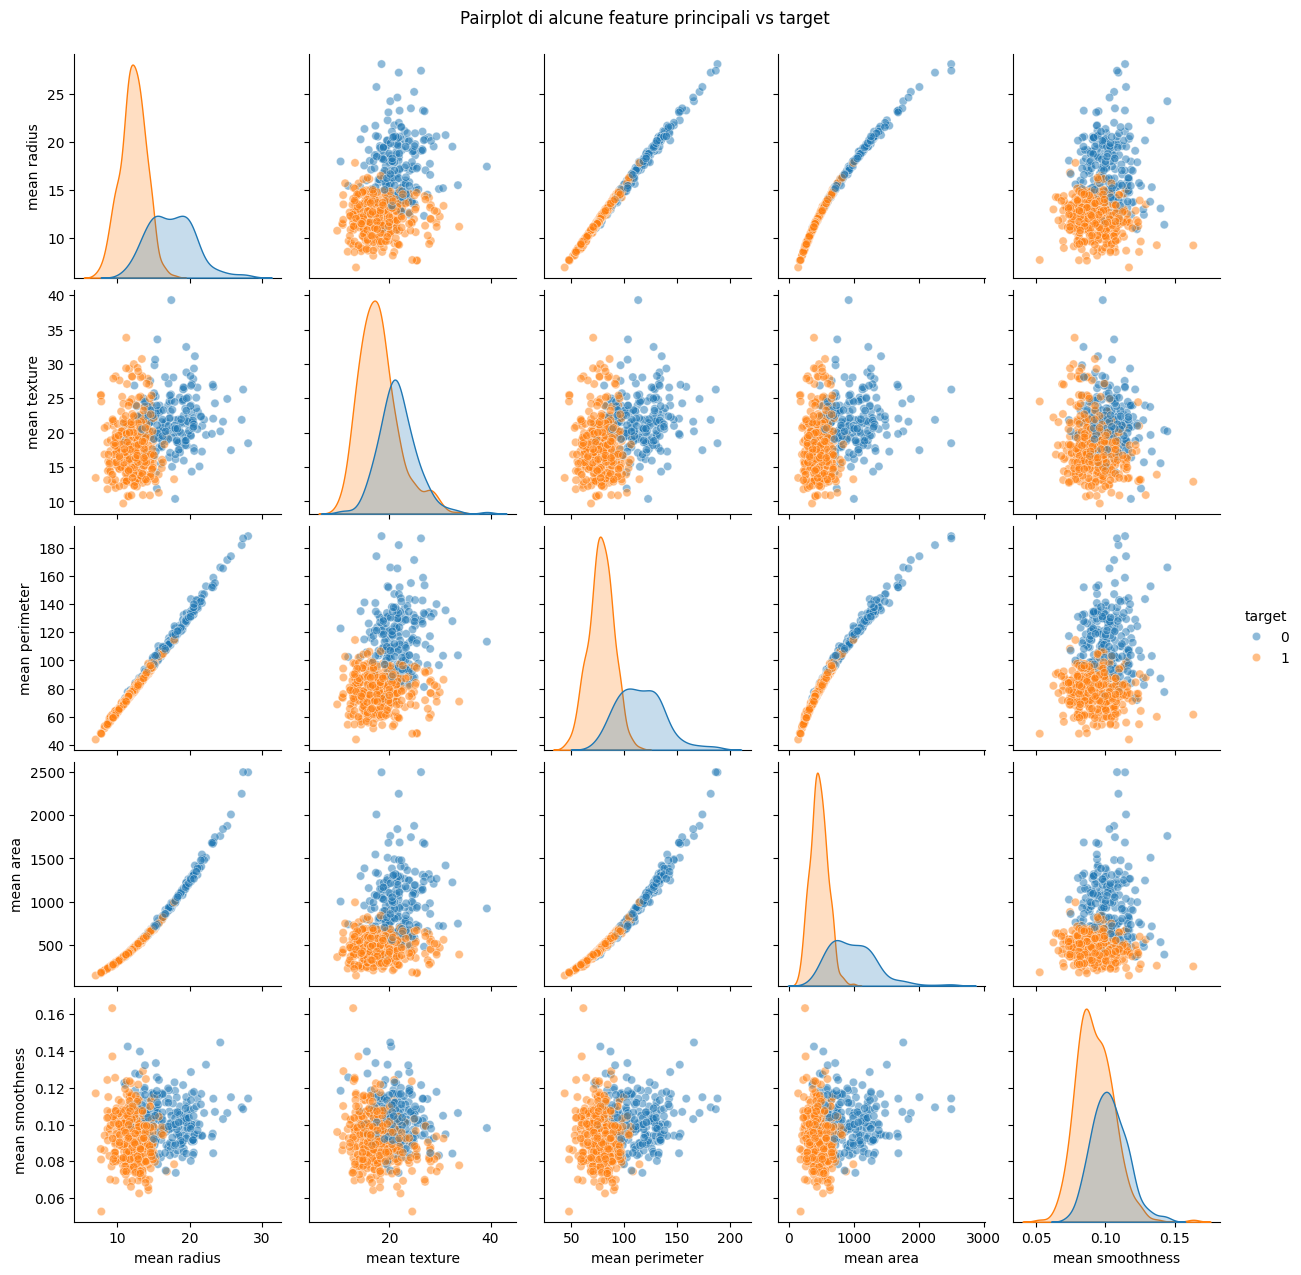

In [198]:
# Selezione di alcune feature principali
selected_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
df_selected = df[selected_cols]

# Pairplot con hue sul target
sns.pairplot(df_selected, hue='target', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot di alcune feature principali vs target', y=1.02)
plt.show()

In [199]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [200]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


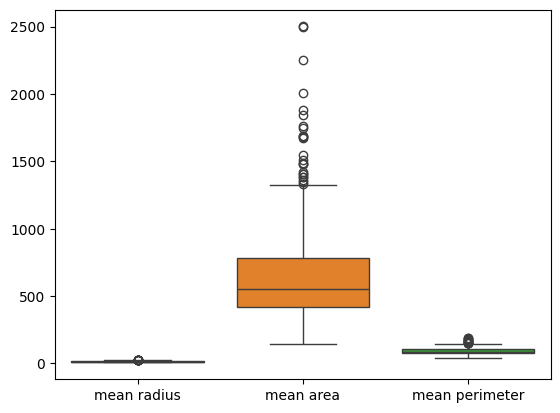

In [201]:
# valutazione della presenza di outlier 
sns.boxplot(data=df[['mean radius','mean area','mean perimeter']])
plt.show()

In [202]:
# Standardizzazione dei dati
scaler = RobustScaler() 
X_scaled = scaler.fit_transform(X)

In [203]:
# Modelli da testare
models = {
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='liblinear', random_state=42)
}

In [204]:
def evaluate_fold(model, X, y, cv):
    print(f"\n--- Risultati Cross-Validation ({cv.get_n_splits()} Folds) ---")
    fold_scores = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)
        fold_scores.append(score)
        print(f"Fold {i}: F1-Score = {score:.4f}")

    mean_score = np.mean(fold_scores)
    std_score = np.std(fold_scores)
    print(f"\n>> Performance Media: {mean_score:.4f}")
    print(f">> Stabilità (Deviazione Std): +/- {std_score:.4f}")

In [205]:
# ---  StratifiedKFold ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression - test iperparametro C
print("\n===== Logistic Regression (StratifiedKFold) =====")
for C in [0.01, 0.1, 1, 10, 100]:
    print(f"\n--- LogisticRegression C={C} ---")
    model_lr = LogisticRegression(solver='liblinear', C=C, random_state=42)
    evaluate_fold(model_lr, X_scaled, y, skf)
    
    


===== Logistic Regression (StratifiedKFold) =====

--- LogisticRegression C=0.01 ---

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9559
Fold 2: F1-Score = 0.9861
Fold 3: F1-Score = 0.9650
Fold 4: F1-Score = 0.9412
Fold 5: F1-Score = 0.9859

>> Performance Media: 0.9668
>> Stabilità (Deviazione Std): +/- 0.0174

--- LogisticRegression C=0.1 ---

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9787
Fold 2: F1-Score = 0.9861
Fold 3: F1-Score = 0.9863
Fold 4: F1-Score = 0.9640
Fold 5: F1-Score = 0.9930

>> Performance Media: 0.9816
>> Stabilità (Deviazione Std): +/- 0.0099

--- LogisticRegression C=1 ---

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9859
Fold 2: F1-Score = 0.9660
Fold 3: F1-Score = 0.9796
Fold 4: F1-Score = 0.9930
Fold 5: F1-Score = 0.9930

>> Performance Media: 0.9835
>> Stabilità (Deviazione Std): +/- 0.0101

--- LogisticRegression C=10 ---

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9645

In [206]:
# KNN - test iperparametri k
print("\n===== KNN Classifier (StratifiedKFold) =====")
for k in [2, 3, 5, 7]:
    print(f"\n--- KNN n_neighbors={k} ---")
    model_knn = KNeighborsClassifier(n_neighbors=k)
    evaluate_fold(model_knn, X_scaled, y, skf)


===== KNN Classifier (StratifiedKFold) =====

--- KNN n_neighbors=2 ---

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9640
Fold 2: F1-Score = 0.9722
Fold 3: F1-Score = 0.9362
Fold 4: F1-Score = 0.9333
Fold 5: F1-Score = 0.9650

>> Performance Media: 0.9542
>> Stabilità (Deviazione Std): +/- 0.0161

--- KNN n_neighbors=3 ---

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9930
Fold 2: F1-Score = 0.9524
Fold 3: F1-Score = 0.9660
Fold 4: F1-Score = 0.9787
Fold 5: F1-Score = 0.9660

>> Performance Media: 0.9712
>> Stabilità (Deviazione Std): +/- 0.0137

--- KNN n_neighbors=5 ---

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9861


Fold 2: F1-Score = 0.9524
Fold 3: F1-Score = 0.9726
Fold 4: F1-Score = 0.9787
Fold 5: F1-Score = 0.9660

>> Performance Media: 0.9712
>> Stabilità (Deviazione Std): +/- 0.0115

--- KNN n_neighbors=7 ---

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9790
Fold 2: F1-Score = 0.9660
Fold 3: F1-Score = 0.9595
Fold 4: F1-Score = 0.9787
Fold 5: F1-Score = 0.9660

>> Performance Media: 0.9698
>> Stabilità (Deviazione Std): +/- 0.0078


In [207]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\n===== Logistic Regression (KFold semplice) =====")
model_lr = LogisticRegression(solver='liblinear', C=1, random_state=42)
evaluate_fold(model_lr, X_scaled, y, kf)

print("\n===== KNN Classifier (KFold semplice) =====")
model_knn = KNeighborsClassifier(n_neighbors=5)
evaluate_fold(model_knn, X_scaled, y, kf)


===== Logistic Regression (KFold semplice) =====

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9930
Fold 2: F1-Score = 0.9868
Fold 3: F1-Score = 0.9790
Fold 4: F1-Score = 0.9930
Fold 5: F1-Score = 0.9778

>> Performance Media: 0.9859
>> Stabilità (Deviazione Std): +/- 0.0066

===== KNN Classifier (KFold semplice) =====

--- Risultati Cross-Validation (5 Folds) ---
Fold 1: F1-Score = 0.9650
Fold 2: F1-Score = 0.9740
Fold 3: F1-Score = 0.9650
Fold 4: F1-Score = 0.9793
Fold 5: F1-Score = 0.9571

>> Performance Media: 0.9681
>> Stabilità (Deviazione Std): +/- 0.0077


In [208]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# --- Logistic Regression Grid Search ---
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=-1
)
grid_lr.fit(X_scaled, y)
print("\n=== Miglior Logistic Regression ===")
print(f"Best Params: {grid_lr.best_params_}")
print(f"Best F1-Score: {grid_lr.best_score_:.4f}")

# --- KNN Grid Search ---
param_grid_knn = {
    'n_neighbors': [2, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=-1
)
grid_knn.fit(X_scaled, y)
print("\n=== Miglior KNN ===")
print(f"Best Params: {grid_knn.best_params_}")
print(f"Best F1-Score: {grid_knn.best_score_:.4f}")

# --- XGBoost Classifier Grid Search ---
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(
    xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=-1
)
grid_xgb.fit(X_scaled, y)
print("\n=== Miglior XGBoost ===")
print(f"Best Params: {grid_xgb.best_params_}")
print(f"Best F1-Score: {grid_xgb.best_score_:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits

=== Miglior Logistic Regression ===
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-Score: 0.9835
Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Miglior KNN ===
Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best F1-Score: 0.9766
Fitting 5 folds for each of 81 candidates, totalling 405 fits

=== Miglior XGBoost ===
Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
Best F1-Score: 0.9764


c:\Users\Rosy\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:25:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Logistic Regression ===
MSE: 0.0123
RMSE: 0.1109
R2: 0.9474


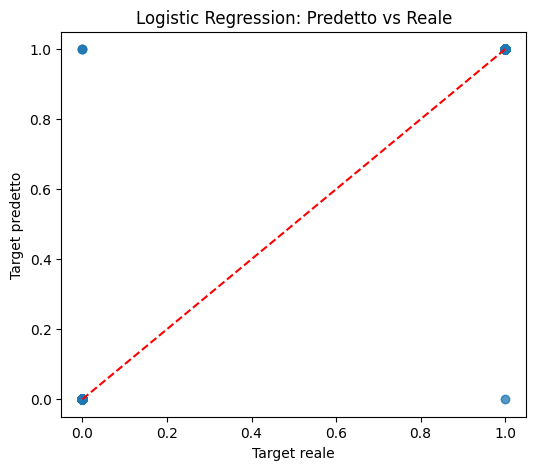


=== KNN Classifier ===
MSE: 0.0158
RMSE: 0.1258
R2: 0.9323


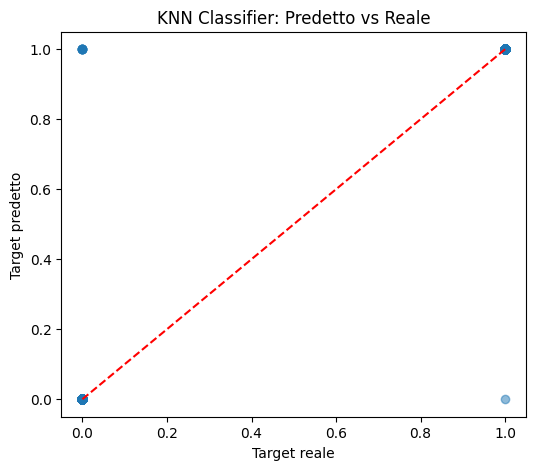


=== XGBoost Classifier ===
MSE: 0.0000
RMSE: 0.0000
R2: 1.0000


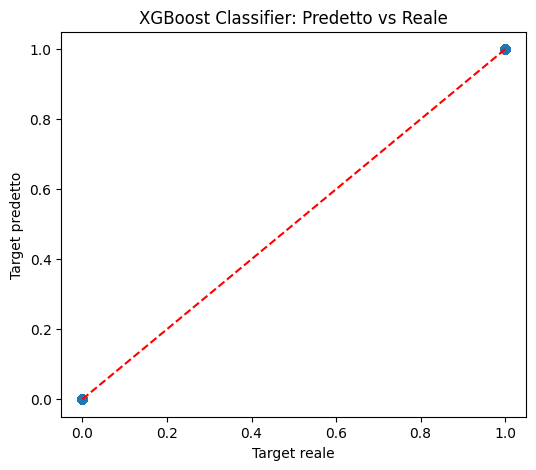

In [210]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Funzione per valutare modello con metriche numeriche
def evaluate_model_numeric(model, X, y, model_name):
    y_pred = model.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    print(f"\n=== {model_name} ===")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")
    
    # Grafico predetti vs reali
    plt.figure(figsize=(6,5))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([0,1],[0,1], 'r--')  # retta y=x
    plt.xlabel("Target reale")
    plt.ylabel("Target predetto")
    plt.title(f"{model_name}: Predetto vs Reale")
    plt.show()

# Logistic Regression - Miglior modello da GridSearch
best_lr = grid_lr.best_estimator_
evaluate_model_numeric(best_lr, X_scaled, y, "Logistic Regression")

# KNN - Miglior modello da GridSearch
best_knn = grid_knn.best_estimator_
evaluate_model_numeric(best_knn, X_scaled, y, "KNN Classifier")

# XGBoost - Miglior modello da GridSearch
best_xgb = grid_xgb.best_estimator_
evaluate_model_numeric(best_xgb, X_scaled, y, "XGBoost Classifier")
